In [9]:
from datetime import datetime, date
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from model.log_dataframe import LogDataFrame
from model.log_configs import RAW_FILES_LOG_CONFIG, PROCESSED_FILES_LOG_CONFIG


pd.set_option('display.max_colwidth', 200)

In [10]:
raw_ldf = LogDataFrame(RAW_FILES_LOG_CONFIG)
log_ldf = LogDataFrame(PROCESSED_FILES_LOG_CONFIG)
df_raw_updated = raw_ldf.update()

if df_raw_updated is not None:
    df_upd = log_ldf.update(raw_ldf.df())

df_log = log_ldf.df()

Processing file /var/log/nginx/files-access.log
Processing file /var/log/nginx/access.log


**Enter report dates**

**_______**

In [12]:
begin_date = date(year=2017, month=1, day=1)
end_date = date(year=2019, month=12, day=31)

**______**

Done generating reports for period 2017-01-01 to 2019-12-31


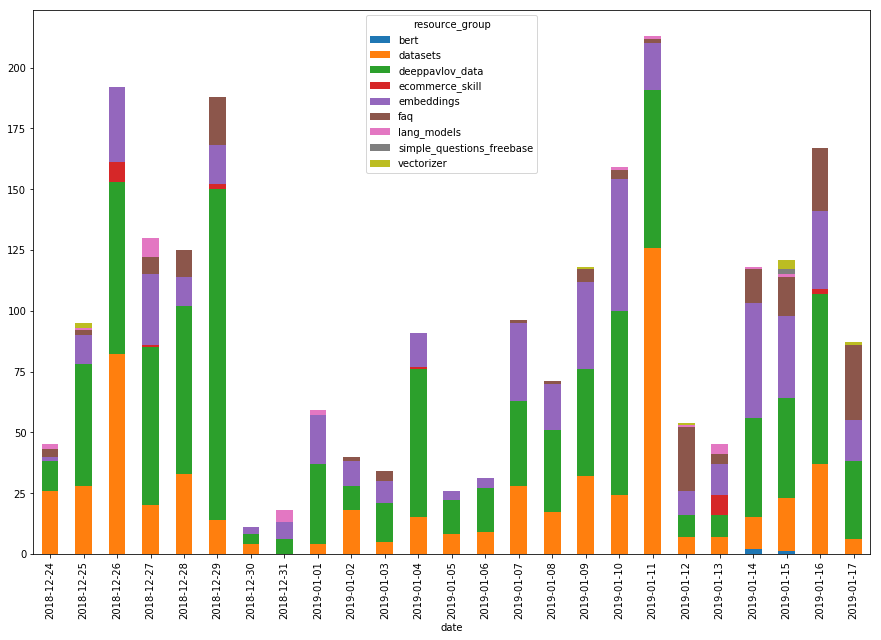

In [13]:
df_log_filtered = df_log[(df_log['date'] >= begin_date) & (df_log['date'] <= end_date) & (df_log['response_code'] == '200')]

report_columns = ['date','resource_group', 'resource', 'outer_request', 'country_from', 'city_from', 'request']
groupby_columns = ['date','resource_group', 'resource', 'outer_request', 'country_from', 'city_from']
df_log_groupby = df_log_filtered[report_columns].groupby(groupby_columns)

report_path = Path('reports/resources_download.csv').resolve()
report_path.parent.mkdir(exist_ok=True)
df_log_groupby.count().to_csv(report_path, header=True)

print(f'Done generating reports for period {str(begin_date)} to {str(end_date)}')

df_log_outer_requests = df_log_filtered[df_log_filtered['outer_request'] == True]
report_columns = ['date','resource_group', 'request']
groupby_columns = ['date','resource_group']
df_log_groped = df_log_outer_requests[report_columns].groupby(groupby_columns)
df_log_groped_count = df_log_groped.count()

fig, ax = plt.subplots(figsize=(15,10))
plot = df_log_groped_count['request'].unstack().plot(kind='bar', ax=ax, stacked=True)